In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots


#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [3]:
import seaborn as sns
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [4]:
data = 'Breast_cancer_data.csv'
df = pd.read_csv(data)
print(df.shape)

(569, 6)


In [5]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# NORMATIZATION

In [55]:
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [57]:

x_array= np.array(df['mean_area'])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.05645593 0.07478578 0.06784864 0.02177586 0.07315019 0.02690822
  0.05865551 0.03259329 0.02931648 0.02684054 0.04499555 0.04404804
  0.06333668 0.04414391 0.03261585 0.03715601 0.03860548 0.04505195
  0.07106341 0.03193906 0.02932776 0.01544783 0.03972783 0.07918494
  0.05101902 0.05147585 0.03636642 0.06170109 0.04130702 0.05386719
  0.06136269 0.02484963 0.0507201  0.06553626 0.0455257  0.04903939
  0.0357009  0.02954208 0.03941199 0.03153862 0.03175294 0.02092987
  0.06226508 0.03074903 0.02997635 0.0606859  0.01138707 0.03015119
  0.02534031 0.03164014 0.02413336 0.03224925 0.02468044 0.05826072
  0.04020159 0.02306741 0.06497226 0.03704885 0.02973383 0.0126617
  0.01759101 0.01250942 0.03641718 0.01471464 0.02814337 0.03769181
  0.01519403 0.02222706 0.01412808 0.02834077 0.06373147 0.01376149
  0.05241773 0.03294297 0.02655854 0.0461179  0.03153862 0.05673793
  0.07021742 0.02855508 0.02264441 0.02932776 0.10591832 0.06384427
  0.02500191 0.0606295  0.03655818 0.0606859  0.0

In [7]:
df.diagnosis.unique()

array([0, 1], dtype=int64)

# STANDADIZATION


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('mean_smoothness', axis=1),
                                                    df['mean_smoothness'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((398, 5), (171, 5))

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
scaler.mean_

array([1.41855000e+01, 1.91928392e+01, 9.23355025e+01, 6.61859045e+02,
       6.25628141e-01])

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [14]:
X_train_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,diagnosis
0,-0.749980,-1.099787,-0.741586,-0.701887,0.773559
1,-1.028214,-0.139262,-1.029804,-0.894732,0.773559
2,-0.538522,-0.299349,-0.568574,-0.550561,0.773559
3,1.147577,-0.146430,1.061698,1.035628,-1.292726
4,-2.004538,-1.376954,-1.962370,-1.415904,0.773559


# DISCRETIZATION

In [16]:
df['binned']=pd.cut(x=df['mean_texture'], bins=[0,25,50,100,200])

In [17]:
df.head

<bound method NDFrame.head of      mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis    binned  
0     

In [19]:
df['height_bin']=pd.cut(x = df['mean_radius'],
                        bins = [0,25,50,100,200], 
                        labels = [0, 1, 2,3])
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,binned,height_bin
0,17.99,10.38,122.80,1001.0,0.11840,0,"(0, 25]",0
1,20.57,17.77,132.90,1326.0,0.08474,0,"(0, 25]",0
2,19.69,21.25,130.00,1203.0,0.10960,0,"(0, 25]",0
3,11.42,20.38,77.58,386.1,0.14250,0,"(0, 25]",0
4,20.29,14.34,135.10,1297.0,0.10030,0,"(0, 25]",0
...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0,"(0, 25]",0
565,20.13,28.25,131.20,1261.0,0.09780,0,"(25, 50]",0
566,16.60,28.08,108.30,858.1,0.08455,0,"(25, 50]",0
567,20.60,29.33,140.10,1265.0,0.11780,0,"(25, 50]",0


In [20]:
df['height_bin']=pd.cut(x=df['mean_radius'], bins=[0,25,50,100,200], 
                        labels=[ " very small", "small","medium","huge",])
print(df.head())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis   binned   height_bin  
0          0  (0, 25]   very small  
1          0  (0, 25]   very small  
2          0  (0, 25]   very small  
3          0  (0, 25]   very small  
4          0  (0, 25]   very small  


# Data Summarization

In [21]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [22]:
df.groupby("diagnosis")

In [23]:
df.groupby("diagnosis")["mean_radius"].mean()

diagnosis
0    17.462830
1    12.146524
Name: mean_radius, dtype: float64

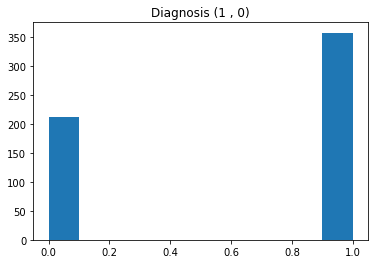

In [24]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (1 , 0)')
plt.show()

# Data Visualization

## Historgram

(array([ 93., 251., 101.,  47.,  51.,  14.,   6.,   3.,   1.,   2.]),
 array([ 143.5 ,  379.25,  615.  ,  850.75, 1086.5 , 1322.25, 1558.  ,
        1793.75, 2029.5 , 2265.25, 2501.  ]),
 <BarContainer object of 10 artists>)

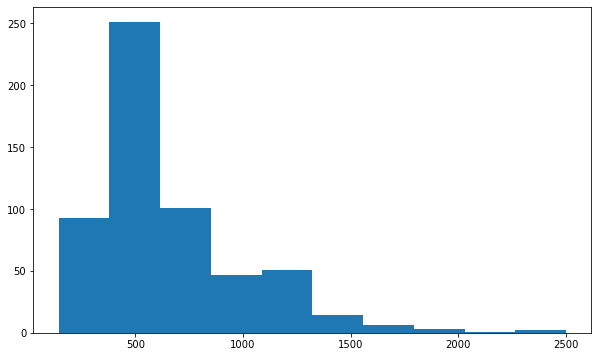

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df["mean_area"], bins=10)

In [27]:
df.head(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,binned,height_bin
0,17.99,10.38,122.8,1001.0,0.11840,0,"(0, 25]",very small
1,20.57,17.77,132.9,1326.0,0.08474,0,"(0, 25]",very small


# Line Plot


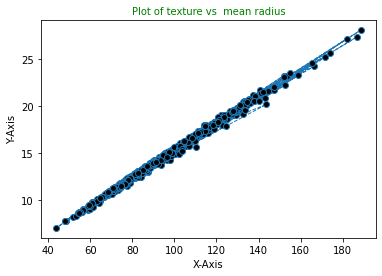

In [32]:

# plotting the data
texture = df ['mean_perimeter'].tolist()
meanofradius  = df ['mean_radius'].tolist()
plt.plot(texture, meanofradius, 
       marker='o', markerfacecolor='k', 
      linestyle='--', linewidth=1)
 
# Adding title to the plot
plt.title("Plot of texture vs  mean radius", fontsize=10, color="green")
 
# Adding label on the y-axis
plt.ylabel('Y-Axis')
 
# Adding label on the x-axis
plt.xlabel('X-Axis')
 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


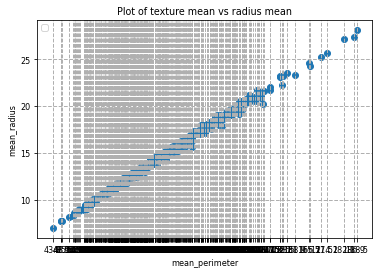

In [37]:
texture  = df ['mean_perimeter'].tolist()
meanofradius = df ['mean_radius'].tolist()
plt.scatter(texture, meanofradius)
plt.xlabel('mean_perimeter')
plt.ylabel('mean_radius')
plt.legend(loc='upper left')
plt.title('Plot of texture mean vs radius mean')
plt.xticks(texture)
plt.grid(True, linewidth= 1, linestyle="--")
plt.show()

# OBSERVATIONS


In [38]:
import plotly.graph_objs as go

In [39]:
import seaborn as sns

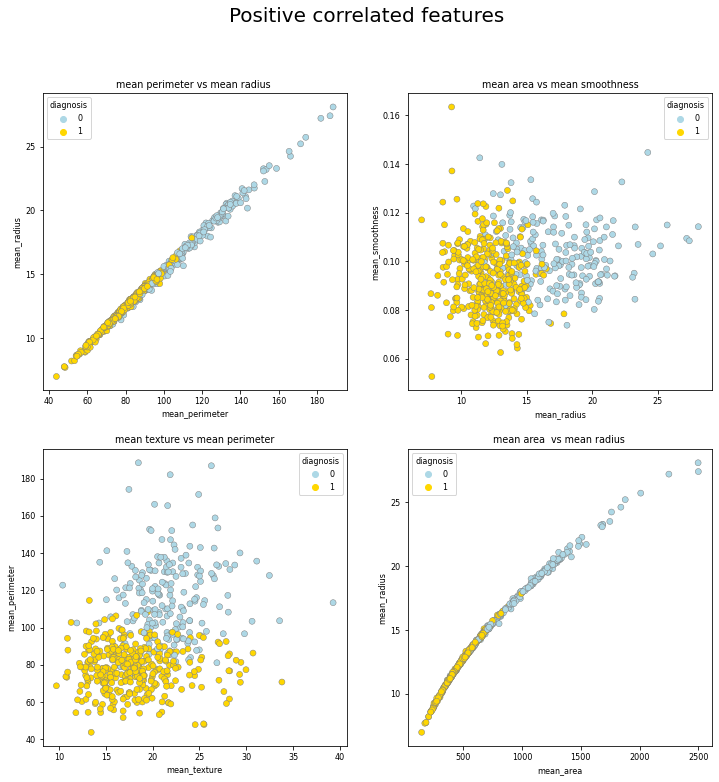

In [40]:
#seaborn version : 

palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['mean_perimeter'], y = df['mean_radius'], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
plt.title('mean perimeter vs mean radius ')
plt.subplot(222)
ax2 = sns.scatterplot(x = df['mean_radius'], y = df['mean_smoothness'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('mean area vs mean smoothness')
plt.subplot(223)
ax3 = sns.scatterplot(x = df['mean_texture'], y = df['mean_perimeter'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('mean texture vs mean perimeter')
plt.subplot(224)
ax4 = sns.scatterplot(x = df['mean_area'], y = df['mean_radius'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('mean area  vs mean radius ')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('1')
plt.show()

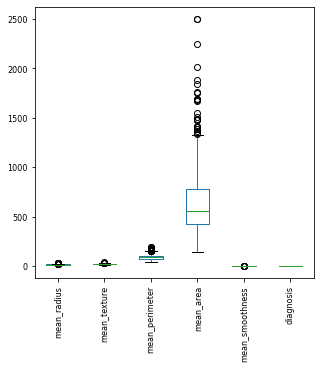

In [41]:
boxplot = df.boxplot(figsize = (5,5), rot = 90, fontsize= '8', grid = False)

# Data Interpretatiom

In [42]:
traindf, testdf = train_test_split(df, test_size = 0.3)

# Model Classification

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [44]:
#Generic function for making a classification model and accessing the performance. 
from sklearn.model_selection import cross_validate
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

 

# Logistic Regression model

In [59]:
predictor_var = ['mean_radius','mean_perimeter','mean_area','mean_texture','mean_area','mean_smoothness']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 91.206%


c:\Users\sh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [61]:
predictor_var = ['mean_radius']
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 89.447%


# Decision Tree Model

In [62]:
predictor_var = ['mean_radius','mean_perimeter','mean_area','mean_texture','mean_area','mean_smoothness']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%


In [63]:
predictor_var = ['mean_radius']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 97.487%
